<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM FILTER

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [2]:
from google.colab import drive

# Akses Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [4]:
def convolution2d(image, kernel, stride, padding):
    # Menambahkan padding pada citra
    image_padded = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    # Ukuran citra dan kernel
    i_h, i_w = image_padded.shape
    k_h, k_w = kernel.shape

    # Ukuran hasil output
    o_h = int((i_h - k_h) / stride) + 1
    o_w = int((i_w - k_w) / stride) + 1

    # Inisialisasi output
    output = np.zeros((o_h, o_w))

    # Operasi konvolusi
    for y in range(0, o_h):
        for x in range(0, o_w):
            region = image_padded[y*stride:y*stride+k_h, x*stride:x*stride+k_w]
            output[y, x] = np.sum(region * kernel)

    return output

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

Sharpen

In [7]:
kernel_sharpen = np.array([[0, -1, 0],[-1, 5, -1], [0, -1, 0]])



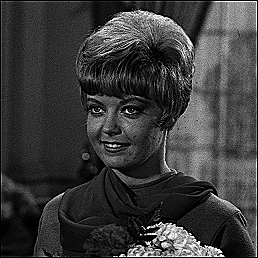

In [14]:
output_img = convolution2d(img_gray, kernel_sharpen, 1, 2)

cv2_imshow(output_img)

Emboss

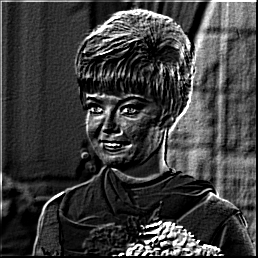

In [16]:
kernel_emboss = np.array([[-2, -1, 0],[-1, 1, 1], [0, 1, 2]])
output_img = convolution2d(img_gray, kernel_emboss, 1, 2)

cv2_imshow(output_img)

Left Sobel Edge Detection

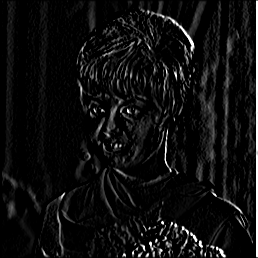

In [17]:
kernel_lsed = np.array([[1, 0, -1],[2, 0, -2], [1, 0, -1]])
output_img = convolution2d(img_gray, kernel_lsed, 1, 2)

cv2_imshow(output_img)

Canny Edge Detection

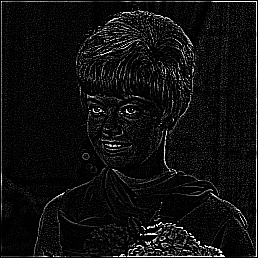

In [18]:
kernel_ced = np.array([[-1, -1, -1],[-1, 8, -1], [-1, -1, -1]])
output_img = convolution2d(img_gray, kernel_ced, 1, 2)

cv2_imshow(output_img)

Prewitt Edge Detection

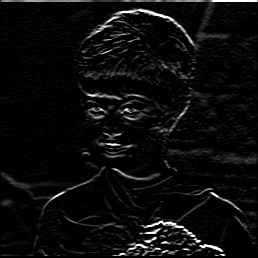

In [19]:
kernel_ped = np.array([[-1, -1, -1],[0, 0, 0], [1, 1, 1]])
output_img = convolution2d(img_gray, kernel_ped, 1, 2)

cv2_imshow(output_img)

5x5 Gaussian Blur

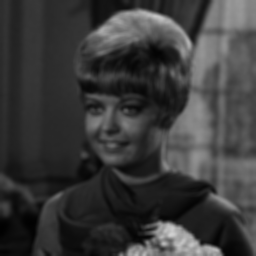

In [27]:
sigma = math.sqrt(5)

gaussian_kernel = cv.getGaussianKernel(5, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

filtered_img = cv.filter2D(img_gray, -1, gauss_kernel)

cv2_imshow(filtered_img)

21x21 Gaussian Blur

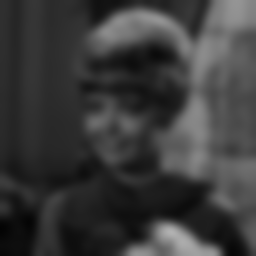

In [28]:
sigma = math.sqrt(21)

gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

filtered_img = cv.filter2D(img_gray, -1, gauss_kernel)

cv2_imshow(filtered_img)